<a href="https://colab.research.google.com/github/LilithUmberger/TurtleAerobiomeData/blob/Code-and-Output/Presence_Absence_Matrix_(R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Code

In [34]:
# Starting fresh with an empty directory and then importing needed files


unlink('/content/*',recursive = TRUE)

library(ggplot2)
install.packages('reshape2')
library(reshape2)
install.packages('git2r')
library(git2r)

path <- '/content'
newfolder <- 'PAUnzipped'
newpath <- file.path(path,newfolder)
dir.create(newpath)
newfolder2 <- 'TurtleAerobiomeData'
newpath2 <- file.path(path,newfolder2)
dir.create(newpath2)
url <- 'https://github.com/LilithUmberger/TurtleAerobiomeData.git'
path2 <- '/content/TurtleAerobiomeData'
bn <- 'Code-and-Output'
clone(url, path2, branch = bn)
zip <- '/content/TurtleAerobiomeData/Python/Outputs/PAMatrices.zip'
out <- '/content/PAUnzipped'
unzip(zip,exdir=out)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



cloning into '/content/TurtleAerobiomeData'...
Receiving objects:   1% (5/492),   12 kb
Receiving objects:  11% (55/492),  564 kb
Receiving objects:  21% (104/492),  764 kb
Receiving objects:  31% (153/492), 1352 kb
Receiving objects:  41% (202/492), 1441 kb
Receiving objects:  51% (251/492), 1537 kb
Receiving objects:  61% (301/492), 1583 kb
Receiving objects:  71% (350/492), 1666 kb
Receiving objects:  81% (399/492), 1706 kb
Receiving objects:  91% (448/492), 1706 kb
Receiving objects: 100% (492/492), 1706 kb, done.


Local:    Code-and-Output /content/TurtleAerobiomeData
Remote:   Code-and-Output @ origin (https://github.com/LilithUmberger/TurtleAerobiomeData.git)
Head:     [1370a29] 2024-09-09: Rename R/Outputs/Turtle_Virus_PA.png to R/Version1/Outputs/Turtle_Virus_PA.png

In [35]:
# Function creating individual data frames of each type of sample

combo <- function(fpath,xfile)
{fpname <- as.character(fpath)
fpath <- read.csv(fpath)


if (grepl('Bac',fpname))
{fsplit <- strsplit(fpname,'/')
fucname <- fsplit[[1]][4]
fucname <- as.character(fucname)
fname <- gsub('BacPA.csv','',fucname)}
else if (grepl('Vir',fpname))
{fsplit <- strsplit(fpname,'/')
fucname <- fsplit[[1]][4]
fucname <- as.character(fucname)
fname <- gsub('VirPA.csv','',fucname)}

if (nrow(xfile) == 0)
{xfile <- data.frame(Name = fpath$Name, P.A = fpath$P.A)
names(xfile)[names(xfile) == 'P.A'] <- fname}
else if (nrow(xfile) != 0)
{xfile <- cbind(xfile, fpath$P.A)
names(xfile)[names(xfile) == 'fpath$P.A'] <- fname}
return(xfile)}

In [36]:
# Applies the function to each file in the directory and creates a matrix of
# the finished dataframes

dpath <- '/content/PAUnzipped'
files <- list.files(dpath)
tbxfile <- data.frame()
tvxfile <- data.frame()
abxfile <- data.frame()
avxfile <- data.frame()

for (file in files)
{fpath <- file.path(dpath,file)
fcpath <- as.character(fpath)
if(grepl('Turtle',fcpath) && grepl('Bac',fcpath))
{tbxfile <- combo(fpath,tbxfile)}
else if(grepl('Turtle',fcpath) && grepl('Vir',fcpath))
{tvxfile <- combo(fpath,tvxfile)}
else if(grepl('Air',fcpath) && grepl('Bac',fcpath))
{abxfile <- combo(fpath,abxfile)}
else if(grepl('Air',fcpath) && grepl('Vir',fcpath))
{avxfile <- combo(fpath,avxfile)}}

png('Turtle_Bacteria_PA.png')
tbxfile <- melt(tbxfile)
ggplot(tbxfile,aes(x=variable,y=Name,fill=value))+geom_tile()
dev.off()
png('Turtle_Virus_PA.png')
tvxfile <- melt(tvxfile)
ggplot(tvxfile,aes(x=variable,y=Name,fill=value))+geom_tile()
dev.off()
png('Air_Bacteria_PA.png')
abxfile <- melt(abxfile)
ggplot(abxfile,aes(x=variable,y=Name,fill=value))+geom_tile()
dev.off()
png('Air_Virus_PA.png')
avxfile <- melt(avxfile)
ggplot(avxfile,aes(x=variable,y=Name,fill=value))+geom_tile()
dev.off()

Using Name as id variables



png 
  2

Using Name as id variables



png 
  2

Using Name as id variables



png 
  2

Using Name as id variables



png 
  2

# Test Zone

In [37]:
# Working for smallest units

f1path <- '/content/PAUnzipped/Turtle12BacPA.csv'
f2path <- '/content/PAUnzipped/Turtle77BacPA.csv'

file1 <- read.csv(f1path)
file2 <- read.csv(f2path)

f1pname <- as.character(f1path)
f1split <- strsplit(f1pname,'/')
f1ucname <- f1split[[1]][4]
f1ucname <- as.character(f1ucname)
f1name <- gsub('BacPA.csv','',f1ucname)

f2pname <- as.character(f2path)
f2split <- strsplit(f2pname,'/')
f2ucname <- f2split[[1]][4]
f2ucname <- as.character(f2ucname)
f2name <- gsub('BacPA.csv','',f2ucname)

names(file1)[names(file1) == 'P.A'] <- f1name
file1 <- cbind(file1, file2$P.A)
names(file1)[names(file1) == 'file2$P.A'] <- f2name

print(file1)

                      Name Turtle12 Turtle77
1         Acetobacteraceae        0        1
2        Acidobacteriaceae        0        0
3         Actinomycetaceae        0        0
4            Archangiaceae        0        0
5          Azospirillaceae        0        0
6              Bacillaceae        1        0
7        Bradyrhizobiaceae        0        0
8        Brevibacteriaceae        1        1
9         Chitinophagaceae        0        0
10          Comamonadaceae        0        0
11      Corynebacteriaceae        1        1
12        Dermabacteraceae        0        1
13          Dermacoccaceae        0        0
14        Dermatophilaceae        0        0
15             Dietziaceae        1        0
16      Enterobacteriaceae        1        1
17         Enterococcaceae        1        0
18             Erwiniaceae        1        0
19     Geodermatophilaceae        0        1
20              Hafniaceae        1        0
21       Hymenobacteraceae        0        0
22      In

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Using Name as id variables



                       Name variable value
1          Acetobacteraceae Turtle12     0
2         Acidobacteriaceae Turtle12     0
3          Actinomycetaceae Turtle12     0
4             Archangiaceae Turtle12     0
5           Azospirillaceae Turtle12     0
6               Bacillaceae Turtle12     1
7         Bradyrhizobiaceae Turtle12     0
8         Brevibacteriaceae Turtle12     1
9          Chitinophagaceae Turtle12     0
10           Comamonadaceae Turtle12     0
11       Corynebacteriaceae Turtle12     1
12         Dermabacteraceae Turtle12     0
13           Dermacoccaceae Turtle12     0
14         Dermatophilaceae Turtle12     0
15              Dietziaceae Turtle12     1
16       Enterobacteriaceae Turtle12     1
17          Enterococcaceae Turtle12     1
18              Erwiniaceae Turtle12     1
19      Geodermatophilaceae Turtle12     0
20               Hafniaceae Turtle12     1
21        Hymenobacteraceae Turtle12     0
22       Intrasporangiaceae Turtle12     0
23         

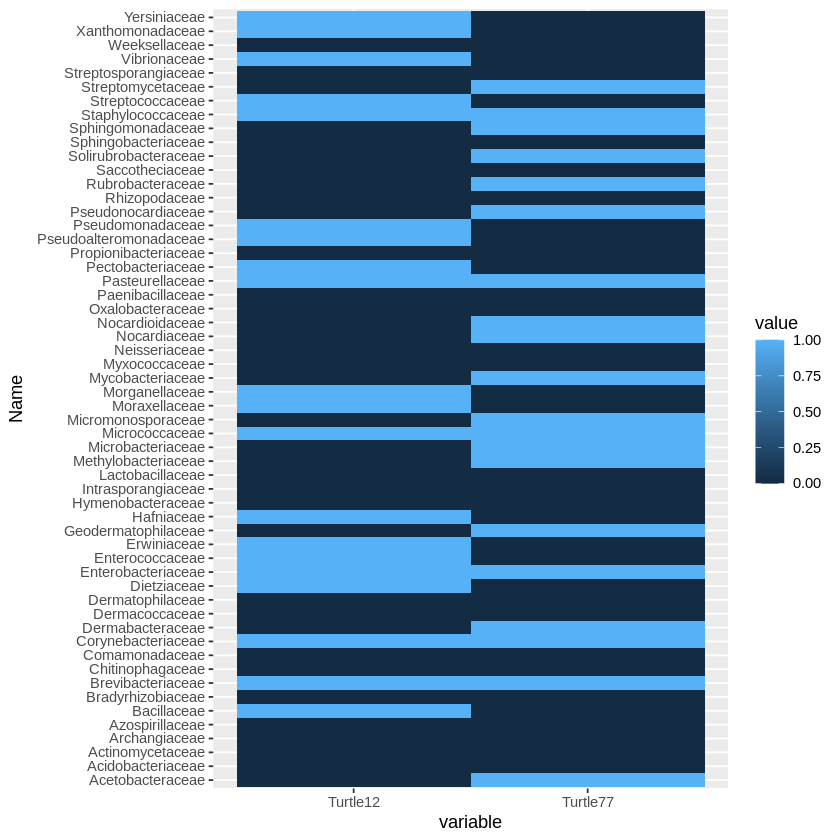

In [38]:
# Graphic code for two
#png('Graphic_For_Two.png')
library(ggplot2)
install.packages('reshape2')
library(reshape2)
file1 <- melt(file1)
print(file1)
ggplot(file1,aes(x=variable,y=Name,fill=value))+geom_tile()
#dev.off()

In [39]:
print(avxfile)

                                     Name variable value
1        Acanthamoeba polyphaga mimivirus    AirF2     0
2                        Bacillus phage G    AirF2     1
3                              Badnavirus    AirF2     0
4                        BeAn 58058 virus    AirF2     1
5                      Blackberry virus F    AirF2     0
6                              Bongovirus    AirF2     1
7    Cafeteria roenbergensis virus BV-PW1    AirF2     1
8                            Caudovirales    AirF2     0
9          Chrysochromulina ericina virus    AirF2     0
10                             Citexvirus    AirF2     0
11          Cladosporium fulvum T-1 virus    AirF2     0
12             Escherichia phage 500465-1    AirF2     0
13                   Escherichia phage D6    AirF2     0
14                Escherichia phage RCS47    AirF2     0
15        Escherichia phage vB_EcoM_G4507    AirF2     0
16                           Eurybiavirus    AirF2     1
17       Faecalibacterium phage